# MATH 245 Project 3 - Curve fitting and interpolation

## Niels Clayton - 300437590

## Question 1


### Introduction

The purpose of question 1 is to implement an interpolation (curve fitting) 
algorithm that utilises Newtons polynomials it fit a curve to the dataset, and 
Horner's formula to evaluate this polynomial. 

### Procedure
###### (a)
Implement two functions, coefs() and evalp(). 

The function coefs() will implement the formula for calculating a Newtons polynomial. 
this will calculate and return the coefficients of the polynomial that will pass through 
all the given data points.

The function evalp() will implement Horner's formula for the evaluation of polynomials. 
This will calculate and return the y values of the polynomial for a list of x values.

These two functions will then be combined into one function, newtinterp(). This 
function will take the x,y coordinates of the data you wish to interpolate, as well 
as a list of x-points at which you with to estimate their y value.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as sci


In [20]:
def coefs(x, y):

    n = x.size
    a = np.ndarray.tolist(y)

    for k in range(1, n):

        for i in range(0, k):

            a[k] = ((a[k]-a[i])/(x[k]-x[i]))
    return np.array(a)


def evalp(a, x, z):

    n = a.size-1
    s = a[n]

    for i in range(n-1, -1, -1):
        s = a[i]+((z - x[i])*s)

    return s


def newtinterp(x, y, z):

    return evalp(coefs(x,y), x, z)


###### (b)
Sample 6 equidistant points over one period of a sin wave, $x \in [0, 2\pi]$.
Using these points, use the implemented newtinterp() function to compute 
the interpolating polynomial, and evaluate it at 101 points across the same x period.


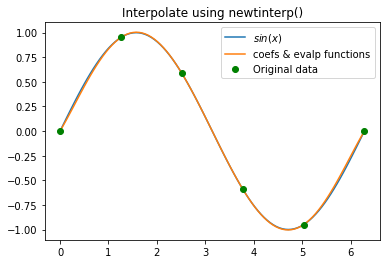

In [21]:
x = np.linspace(0, 2*np.pi, 6)
y = np.sin(x)
z = np.linspace(0, 2*np.pi, 101)
y1 = newtinterp(x, y, z)



# original function
plt.plot(z, np.sin(z), label='$sin(x)$')
plt.plot(z, y1, label='coefs & evalp functions')
plt.plot(x, y, 'go', label='Original data')
plt.title('Interpolate using newtinterp()')
plt.legend()
plt.show()


###### (c)
Compare the output from newtinterp() to the python functions:

- polyfit() and polyval()

- CubicSpline()

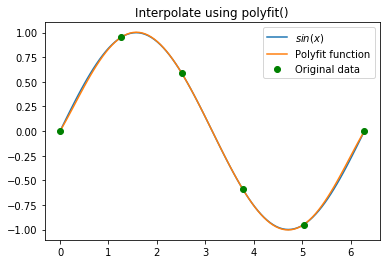

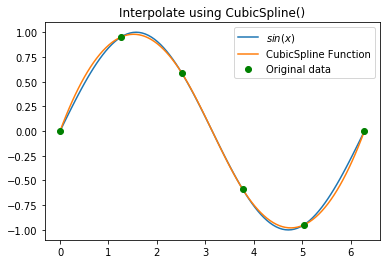

In [22]:
# polyfit

y = np.sin(x)
coefficients = np.polyfit(x, y, 5)
y2 = np.polyval(coefficients, z)
plt.plot(z, np.sin(z), label='$sin(x)$')
plt.plot(z, y2, label='Polyfit function')
plt.plot(x, y, 'go', label='Original data')
plt.title('Interpolate using polyfit()')
plt.legend()
plt.show()



# cubic spline


polynomial = sci.CubicSpline(x,y)
y3 = polynomial(z)
plt.plot(z, np.sin(z), label='$sin(x)$')
plt.plot(z, y3, label='CubicSpline Function')
plt.plot(x, y, 'go', label='Original data')
plt.title('Interpolate using CubicSpline()')
plt.legend()
plt.show()

### Observations & Discussion

It can be seen that all three functions will produce a polynomial that will 
pass through all the provided points. However it can be noted that the polynomial 
produced by the interpolation algorithm implemented in this assignment, and the 
polynomial produced by numpy's polyfit() are visually identical. It can also be seen 
the CubicSpline() function produced a less accurate polynomial in this instance. 



### Conclusions

Due to the similarities between the output polynomials and the original 
sampled function, we conclude that using a Newtons polynomial is an appropriate 
way to interpolate data around existing data points.

## Question 2


### Introduction

The purpose of question 2 is to use the newtinterp() function produced in question 1
to fit a polynomial to the 5 yearly New Zealand population data. 
This will then be compared to the output polynomial produced by the CubicSpline function,
and then used to attempt an approximation of future data points.

### Procedure
###### (a)
Using the  provided table of New Zealand population data, we will fit a polynomial to
the data using the newtinterp() function.


In [23]:
t = np.array([1991, 1996, 2001, 2006, 2011, 2016])
y = np.array([3516000, 3762300, 3916200, 4209100, 4399400, 4747200])
z = np.linspace(1991, 2016, 1000)

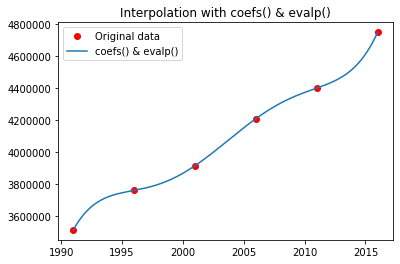

In [24]:
plt.plot(t, y, 'ro', label='Original data')
y1 = newtinterp(t,y,z)
plt.plot(z, y1,label='coefs() & evalp()')
plt.title('Interpolation with coefs() & evalp()')
plt.legend()
plt.show()


###### (b)
Compare the polynomial produced by the newtinterp() to the polynomial produced by
the scipy function CubicSpline().


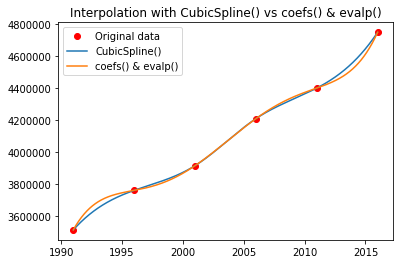

In [25]:
polynomial = sci.CubicSpline(t,y)
y2 = polynomial(z)
plt.plot(t, y, 'ro', label='Original data')
plt.plot(z, y2,label='CubicSpline()')
plt.plot(z, y1,label='coefs() & evalp()')
plt.legend()
plt.title('Interpolation with CubicSpline() vs coefs() & evalp()')
plt.show() 


###### (c)
Using the polynomial produced by newtinterp(), make an approximation 
of New Zealand's population for the years of 2018, and 2034.


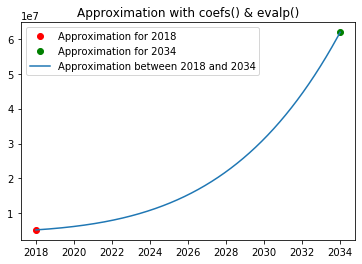

Aproximation for 2018: 5247519.0144
Aproximation for 2034: 61900967.38559998


In [26]:
z1 = np.linspace(2018, 2034, 1000)
y3 = newtinterp(t,y,z1)
aprox1 = newtinterp(t,y,2018)
aprox2 = newtinterp(t,y,2034)
plt.plot(2018, aprox1,'ro', label = 'Approximation for 2018')
plt.plot(2034, aprox2, 'go', label = 'Approximation for 2034')
plt.plot(z1, y3, label = 'Approximation between 2018 and 2034')
plt.title('Approximation with coefs() & evalp()')
plt.legend()
plt.show()

print("Aproximation for 2018: {}".format(aprox1))
print("Aproximation for 2034: {}".format(aprox2))


### Observations & Discussion

It can be seen that both the newtinterp() function, and the CubicSpline function correctly fit a polynomial
that will pass through all points given. However it can be seen that the CubicSpline() function provides a 
polynomial that deviates less at the outer values compared to newtinterp(). 

It can also be noted that these polynomial interpolations are not suited for the estimation of values outside 
of the input data range. Because of the nature of polynomials, as soon as you deviate from within the data range,
the output will increase or decrease rapidly, and will no longer be an accurate estimation.



### Conclusions

The newtinterp() function can be used to approximate the values of datapoints within a data set, 
becoming less accurate the further you move from the centre of the data set. However is not not 
accurate for estimating the values of points outside of the data set. 

## Question 3


### Introduction

The purpose of question 3 to is to look at the affects that varying the number of data points (and thereby varying
the order of the output polynomial) will have on polynomial based interpolation algorithms like newtinterp(). 
This is then compared to the built in function CubicSpline().


### Procedure
###### (a)
Vary the number of points that we sample the function $\frac{1}{1+25x^2}$, and then use these points to 
generate and plot a polynomial with the newtinterp().


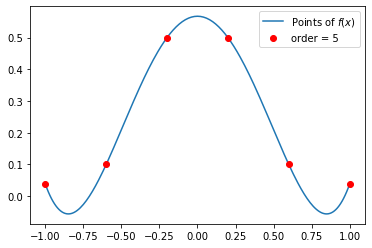

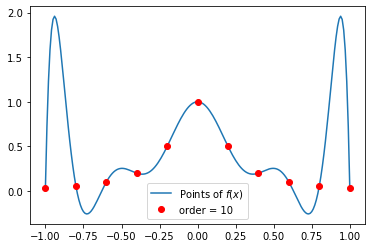

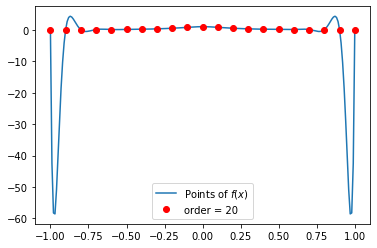

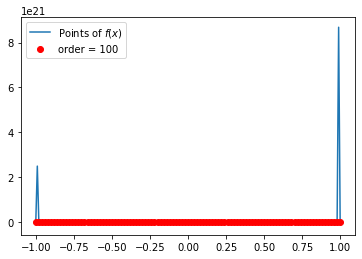

In [27]:
f = lambda x: 1/(1+25*(x**2))

z = np.linspace(-1, 1, 201)
for n in (5,10,20,100):
    x = np.linspace(-1, 1, n+1)
    y = f(x)
    a = newtinterp(x, y, z)
    plt.plot(z, a,label='Points of $f(x)$')
    plt.plot(x, f(x), 'ro', label='order = {}'.format(n))
    plt.legend()
    plt.show()
    

###### (b)

Compare the outputs of out newtinterp() to those of the CubicSpline() function. 


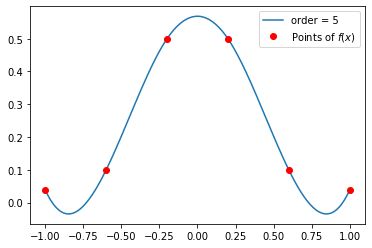

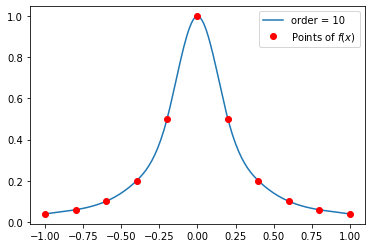

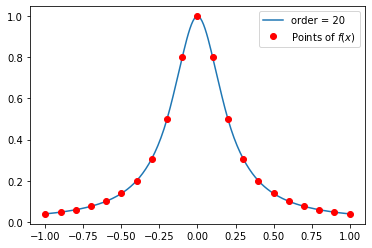

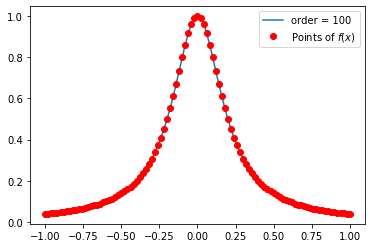

In [28]:
z = np.linspace(-1, 1, 201)
for n in (5,10,20,100):
    x = np.linspace(-1, 1, n+1)
    y = f(x)
    function = sci.CubicSpline(x, y)
    plt.plot(z, function(z), label='order = {}'.format(n))
    plt.plot(x, f(x), 'ro', label='Points of $f(x)$')
    plt.legend()
    plt.show()
    

### Observations and Discussion

It can be seen that the CubicSpline method provides a far more accurate representation of the the sampled function
than the newtinterp(). It can also bee seen that the newtinterp() does provide an accurate representation of the 
function, but only around the centre of the evaluation points, The further form the centre, the greater deviation
from the original function. This is do to the newtinterp() function fitting a polynomial to the points, and the order of 
the polynomial increasing with the number of points. As the order of the polynomial increases, the rate at which it 
grows or decays will also decrease. To combat this effect, the beginning and the end of the sampled points could be 
'padded' with multiple copies of the point. This will have the affect of shifting the inaccuracies over into this 
padded region, that can then be ignored.

### Discussion
The newtinterp() function can be useful for interpolation and for estimation of values within a given dataset, 
however many changes need to be made to the base algorithm in order for it to become more accurate. 


